In [1]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pytesseract import Output
import pytesseract
import re

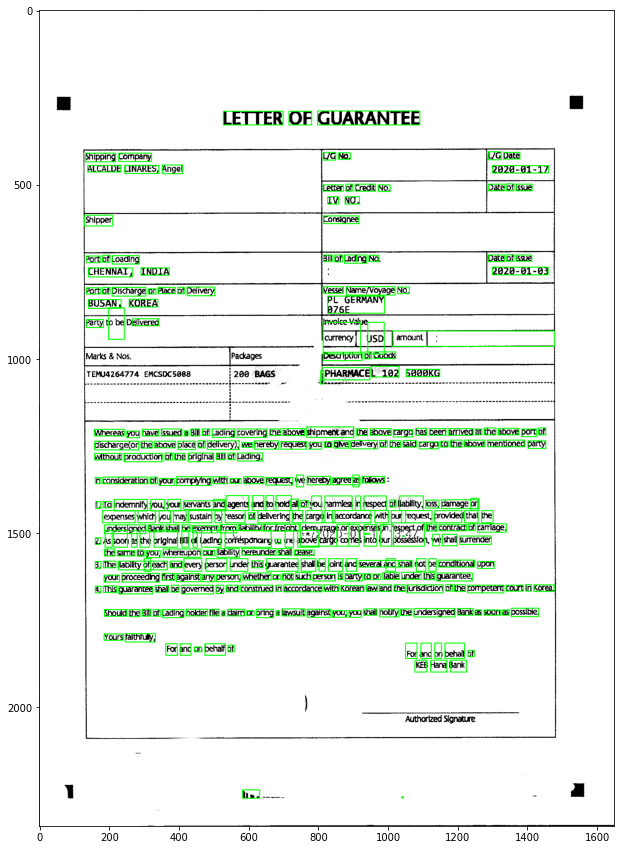

In [8]:
def plot_rgb(image):
    plt.figure(figsize=(30,15))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

def save_rect_dict(path):
    rect = []
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    d = pytesseract.image_to_data(image, output_type = Output.DICT)
    n_boxes = len(d['level'])
    boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
    rect = []
    cnt = 0
    
    for i in range(n_boxes):
        text = d['text'][i]
        text = re.sub('[^a-zA-Z0-9]','',text).strip()
        if text == '':
            continue
        
        xmin = d['left'][i]
        ymin = d['top'][i]
        xmax = d['left'][i] + d['width'][i]
        ymax = d['top'][i] + d['height'][i]

        boxes = cv2.rectangle(boxes, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        
        rect.append({'boundingPoly':{'vertices':[]}, 'uuid{}'.format(cnt):''})
        rect[cnt]['boundingPoly']['vertices'].append([{'x':ymin,'y':xmin}, {'x':ymin,'y':xmax},{'x':ymax, 'y':xmax}, {'x':ymax, 'y':xmin}])
        
        rect[cnt]['uuid{}'.format(cnt)] = text
        cnt += 1

    plot_rgb(boxes)
    
    return rect
    
rect = save_rect_dict('./data/try.jpg')

In [3]:
rect

[{'boundingPoly': {'vertices': [[{'x': 290, 'y': 528},
     {'x': 290, 'y': 699},
     {'x': 329, 'y': 699},
     {'x': 329, 'y': 528}]]},
  'uuid0': 'LETTER'},
 {'boundingPoly': {'vertices': [[{'x': 290, 'y': 716},
     {'x': 290, 'y': 781},
     {'x': 329, 'y': 781},
     {'x': 329, 'y': 716}]]},
  'uuid1': 'OF'},
 {'boundingPoly': {'vertices': [[{'x': 289, 'y': 798},
     {'x': 289, 'y': 1091},
     {'x': 329, 'y': 1091},
     {'x': 329, 'y': 798}]]},
  'uuid2': 'GUARANTEE'},
 {'boundingPoly': {'vertices': [[{'x': 410, 'y': 133},
     {'x': 410, 'y': 219},
     {'x': 435, 'y': 219},
     {'x': 435, 'y': 133}]]},
  'uuid3': 'Shipping'},
 {'boundingPoly': {'vertices': [[{'x': 410, 'y': 228},
     {'x': 410, 'y': 322},
     {'x': 434, 'y': 322},
     {'x': 434, 'y': 228}]]},
  'uuid4': 'Company'},
 {'boundingPoly': {'vertices': [[{'x': 408, 'y': 814},
     {'x': 408, 'y': 850},
     {'x': 430, 'y': 850},
     {'x': 430, 'y': 814}]]},
  'uuid5': 'LG'},
 {'boundingPoly': {'vertices': [[{

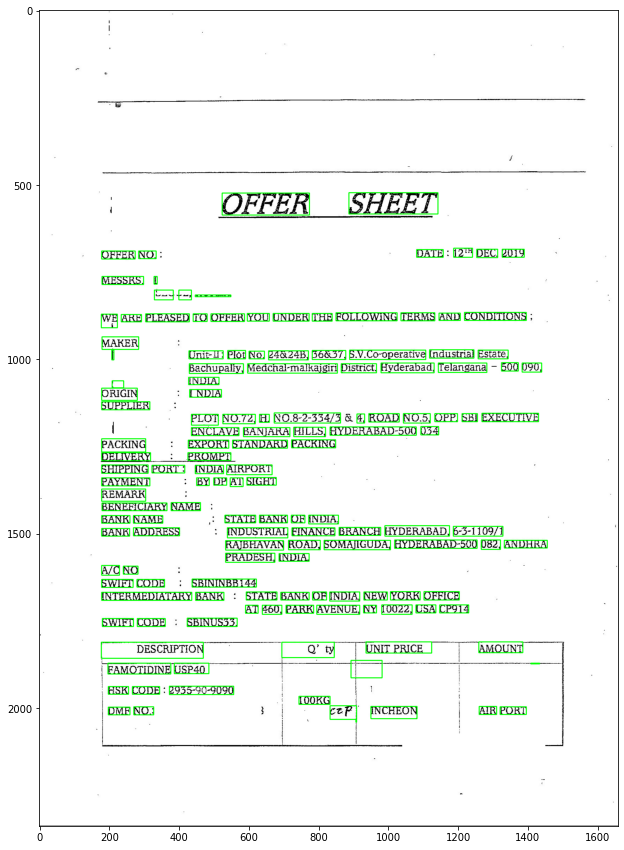

In [10]:
rect = save_rect_dict('./data/jpg/13/13-1.jpg')